Import Necessary libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

Import downlaoded CSV files 

In [2]:
df1 = pd.read_csv('share-of-population-urban.csv', index_col = False) #save as df1

In [3]:
df2= pd.read_csv('taxes-on-incomes-of-individuals-and-corporations-gdp.csv', index_col = False)# save as df2

#### DATA CLEANING

In [4]:
#Lower casing column names 
df1.columns =  map(str.lower, df1.columns)
df2.columns =  map(str.lower, df2.columns)

In [5]:
# check to see the data
df1.head()

,entity,code,year,urban_population
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [29]:
# check to see the data
df2.head()

,entity,code,year,tax_percent_gdp
0,Afghanistan,AFG,2003,0.165953
1,Afghanistan,AFG,2004,0.411647
2,Afghanistan,AFG,2005,0.320864
3,Afghanistan,AFG,2006,1.261181
4,Afghanistan,AFG,2007,1.323461


In [30]:
# check to see the shape data
df1.shape

(15072, 4)

In [31]:
# check to see the shape data
df2.shape

(4871, 4)

# 1. Merge the two datasets such that the resultant dataset contains only the intersection of the rows present in both files

In [33]:
#merge the two data sets on common columns: code, year and entity
df_m = pd.merge(df1, df2, how='inner', on=['code', 'year', 'entity'])

In [34]:
# check to see the merged dataset
df_m. head()

,entity,code,year,urban_population,tax_percent_gdp
0,Afghanistan,AFG,2003,22.353,0.165953
1,Afghanistan,AFG,2004,22.5,0.411647
2,Afghanistan,AFG,2006,22.907,1.261181
3,Afghanistan,AFG,2007,23.113,1.323461
4,Afghanistan,AFG,2008,23.32,1.664719


In [36]:
# check the datatypes and information of your new dataset
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4822 entries, 0 to 4821
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity            4822 non-null   object 
 1   code              4822 non-null   object 
 2   year              4822 non-null   int64  
 3   urban_population  4822 non-null   object 
 4   tax_percent_gdp   4822 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 226.0+ KB


 ##### Attempted to covervet the columm "urban_population" from an object to a float, but found that the data needs more cleaning, there are some rows that contian '%'

In [37]:
df_m.urban_population.str.contains('%', regex=False).value_counts()

False    4807
True       15
Name: urban_population, dtype: int64

In [38]:
# replace % with space 
df_m['urban_population']=df_m.urban_population.str.replace('%','')

In [39]:
# convert the column to float dataytpe
df_m['urban_population'] = df_m.urban_population.astype(float)

In [40]:
# check the datatypes and information of your new dataset
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4822 entries, 0 to 4821
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity            4822 non-null   object 
 1   code              4822 non-null   object 
 2   year              4822 non-null   int64  
 3   urban_population  4822 non-null   float64
 4   tax_percent_gdp   4822 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 226.0+ KB


In [41]:
# explore descriptive statistics of df
df_m.describe()

,year,urban_population,tax_percent_gdp
count,4822.000000,4822.000000,4822.000000
mean,2000.815844,54.562002,6.541968
std,9.825130,24.089673,4.914286
min,1980.000000,4.674000,0.000000
25%,1994.000000,34.030750,2.913589
50%,2001.000000,54.978000,5.453532
75%,2009.000000,74.338750,8.964636
max,2017.000000,100.000000,32.075305


## 2. Export the results to a new file called merged_social_data.csv

In [17]:
df_m.to_csv('merged_social_data.csv',index=False)

## 3. Using the merged results, generate an ordinary least squares regression showing the effect of the independent variable Urban_Population on the dependent variable Tax_Percent_GDP. Ensure that your results contain at a minimum:
### a. The R squared of the results
### b. The t-statistic and p-value of the coefficient and intercept
### c. Degrees of freedom
### d. The spread of the residuals.

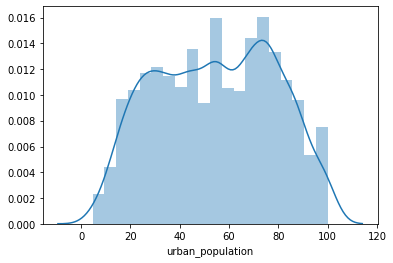

In [42]:
# check to see distribution of urban_population
sns.distplot( df_m['urban_population'])

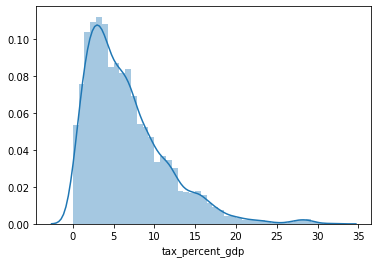

In [43]:
# check to see distribution of tax percent GDP
sns.distplot( df_m['tax_percent_gdp'])

### Fit the model

In [18]:
# fit ols model, independent variable: ubarn_population, dependent variable tax_pecent_gdp
result= ols('tax_percent_gdp~urban_population',data=df_m).fit()

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        tax_percent_gdp   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.84e-221
Time:                        21:23:09   Log-Likelihood:                -14014.
No. Observations:                4822   AIC:                         2.803e+04
Df Residuals:                    4820   BIC:                         2.805e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7040      0.158  

In [20]:
result.resid

0      -3.520089
1      -3.287430
2      -2.473984
3      -2.429969
4      -2.107066
          ...   
4817    7.944561
4818    6.430882
4819    6.188504
4820    5.816027
4821    8.126698
Length: 4822, dtype: float64

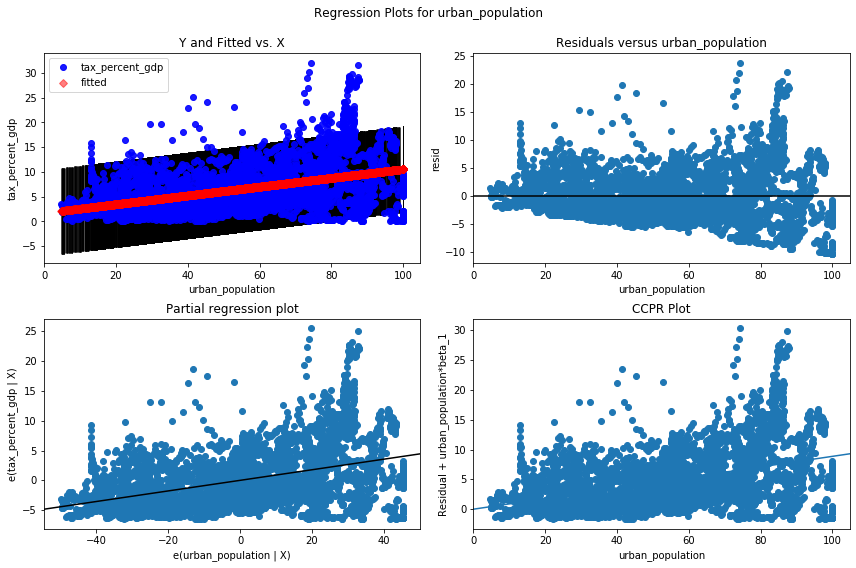

In [21]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(result, 'urban_population', fig=fig)

## 4. Output your results. This can be in a multitude of formats:

In [23]:
#saved result as text file and csv 
with open('summary.txt', 'w') as fh:
    fh.write(result.summary().as_text())

with open('summary.csv', 'w') as fh:
    fh.write(result.summary().as_csv())

## 5. Summarize your results (in the file you made above or a separate document) based onthe output of the model. Be sure to describe the relationship between the independentand dependent variable and your interpretation of its significance. 


From the OLS  summary above, it shows that the independent variable (urban_population) has a positive linear relationship with the dependent variable (tax_percent_gdp). From the coefficient for urban population (0.0887) this means for every one percent increase in the urban population, this would result in 0.0887 increase in the tax percent GDP.

The R squared of  0.189 in the model means that the model explains approximately 18.9%  percent of the variation in the dependent variable (tax_percent_gdp).  From the information available this is not a good predictive model.

With regards to the independent variable (urban_populaition), the P value is 0.0, meaning that  the independent variable is statistically significant. This is because in the T- test performed,  the null hypothesis is that the coefficient is zero and thus not helping the model. But in this case we reject the null hypothesis since the P value is less than 0.05 and this means the probability of the coefficient of the independent variable being essentially zero is very small. In relation to the data this means that the urban population has a significant positive linear relation with the tax percent GDP,so increase in the urban population would give rise to increase in the tax percent GDP.

Also the residual plot shows the spread is biased and heteroscedastic, this is because there is a systematic change in the spread of the residuals over the range of measured value as seen in the residual vs urban_population plot above.


## 6. Answer the free-form analysis questions below. Note that there are not inherently right or wrong answers; the questions are meant for you to showcase your ability to interpret and understand data:


### a. What were some challenges you encountered in generating the dataset for analysis, if any?

Firstly, I had to derive the exact description of the columns to understand completely the dataset. Cleaning the dataset was quite straightforward except for some “%”  symbol present in some of the rows in the urban population column



### b. Based on this initial model, what steps might you take next to validate or extend your analysis, if any?

I’d look to add more features to the model  that would lead to a better R square,  accounting for more variance in the dependent variable (tax_percent_gdb). 
Also, I'll consider using a different model for this dataset. OLS assumes that the target variable is normally distributed which is not in our case, where the distribution of tax percent GDP is Right skewed.  Also, using OLS for a target variable that is a percentage (proportions) which is bounded between 0-1 (0-100) would lead to fitted values that may be impossible(less than zero or greater than a hundred) hence predicted values that are also impossible. This is also possibly the reason for heteroscedasticity seen in the residual plot, which is not in agreement with the assumptions(that the residual plot be unbiased and homoscedastic ) of an ordinary least square regression. 
I’ll recommend a binomial Generalized Linear Model like logistic regression.



### c. If you were asked to study this relationship, how would you convey your findings?

 For every one percent increase in the urban population, this would result in 0.0887 increase in the tax percent GDP.